In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# Esercitazione 6 _ Bonato Angela

L'esercitazione richiedeva di simulare un modello di Ising monodimensionale, usando per il campionamento sia l'algoritmo di Metropolis che quello di Gibbs, e di effettuare misurazioni a diverse temperature di: energia totale $E_{tot}$, calore specifico $C$ e suscettività magnetica $\chi$ in assenza di campo esterno; magnetizzazione $M$ applicando al sistema di spin un campo $H$ esterno. Tutte le misure sono state espresse in unità naturali (denotate dall'uso dell'apice $^*$) tc $\mu_B=k_B=1$ e normalizzate sul numero di spin simulati $N_s=50$. 

Il modello considerato è risolvibile analiticamente, dunque ho usato il codice fornito dal professore per avere dei valori di riferimento con cui confrontare i risultati delle simulazioni.

## Modifiche al codice

La prima cosa che ho fatto è stata implementare nel codice di simulazione fornito l'algoritmo di Gibbs e la possibilità di misurare tutte le grandezze da analizzare. Ho inoltre definito dei metodi aggiuntivi nella classe system in modo da poter gestire direttamente nel main equilibrazione (cioè una breve simulazione durante cui ho misurato solo l'energia) e analisi (la simulazione seguente che parte dalla configurazione finale dell'equilibrazione e durante cui ho effettuato misurazioni anche delle altre proprietà del sistema) a tutte le temperature richieste. In questo modo, una volta impostato l'algoritmo da usare per il campionamento e il valore del campo esterno, in una sola esecuzione del programma avevo tutti i dati necessari per l'analisi. Infine, ho modificato la scrittura su file dei risultati in modo da segnare per ogni temperatura analizzata solo i valori medi e gli errori all'ultimo blocco.

## Equilibrazione

Diversamente dal caso dell'esercitazione 4, qua si è analizzato un ensemble canonico. Di conseguenza, ogni simulazione è stata effettuata mantenendo costanti il numero di particelle, il volume e la temperatura $T$. Per valutare l'equilibrazione del sistema, quindi, ho osservato l'andamento di $E_{tot}$. 

Per come è scritto il codice, il sistema viene inizializzato in modo che gli spin assumano una configurazione randomica in cui il $50\%$ delle particelle ha spin $s=+1$ e la restante parte $s=-1$. Questa condizione corrisponde a un modello di Ising 1D mantenuto a $T=+\infty$, dunque è conveniente simulare il sistema a partire dalla temperatura maggiore nel range analizzato ($T^*=2.0$) per cui l'equilibrazione richiederà meno tempo. Per simulare la temperatura successiva (più bassa), partendo dall'ultima configurazione assunta dal sistema l'equilibrazione richiederà pochi passi, in quanto il sistema si trova vicino al nuovo equilibrio. 

Nella pratica, una volta constatato il tempo $t_e$ necessario per equilibrare il sistema a $T^*=2.0$, che è maggiore di quello richiesto per gli step successivi di temperatura, ho inserito un ciclo lungo $t_e$ dopo ogni diminuzione del valore di $T$ prima di effettuare la relativa analisi per assicurarmi di lavorare sul sistema equilibrato. Il tempo $t_e$ richiesto dall'algoritmo di Gibbs è confrontabile con quello richiesto dal Metropolis, ma aumenta considerevolmente per entrambi gli algoritmi quanto si passa a situazioni in cui il sistema è sottoposto a un campo esterno da casi in cui si lavora con $H^*=0$.

## Analisi in assenza di campo esterno

Mantenendo $H^*=0$, ho effettuato $N=20$ blocchi da $L=2\cdot10^4$ passi ciascuno per per misurare le grandezze analizzate ad ogni temperatura considerata ($11$ valori di $T^*\in[0.5,2.0]$), facendo evolvere il sistema prima con Gibbs e poi con Metropolis. I risultati ottenuti all'ultimo blocco sono riportati nei grafici sottostanti messi a confronto con i valori analitici. 

Per dare meglio conto degli errori e delle differenze riscontrate con i due algoritmi, inoltre, ho plottato anche la differenza fra ogni valore ricavato da simulazioni ($V_s$) con errore e il suo corrispettivo analitico ($V_a$), che ho usato anche per normalizzare sia i valori medi che gli errori calcolati. 

Tutti i dati ottenuti risultano compatibili con i valori attesi entro $2\sigma$ e non si riscontrano evidenti differenze fra i due algoritmi utilizzati.

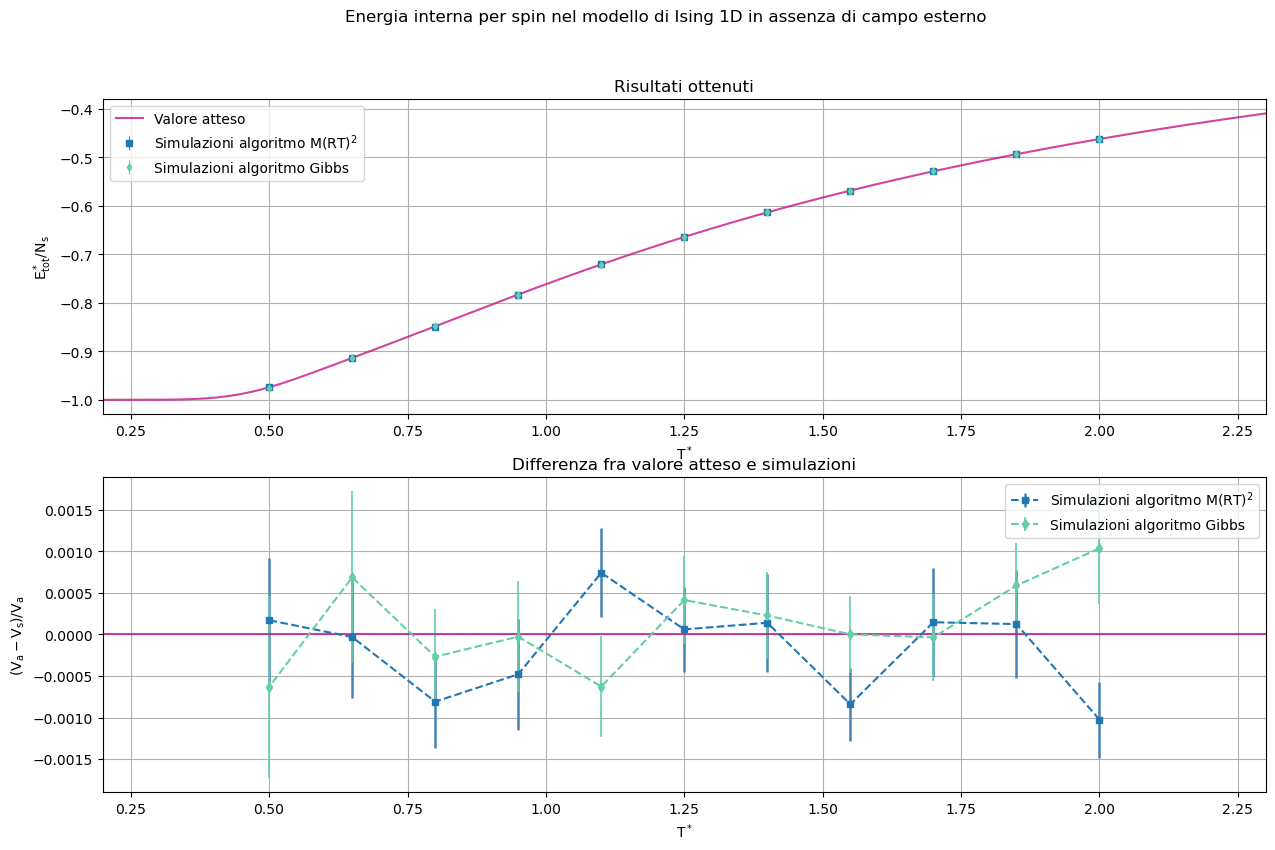

In [3]:
def Etot(T):  #calcolo analitico dell'energia interna
    beta=1/T
    J=1.0
    Ns=50
    th=np.tanh(J/T)
    thN=th**Ns
    ch=1/th
    return -J*( th + ch*thN )/( 1 + thN )

T=np.linspace(0.2, 2.3, 200)  #temperature per il plot del valore analitico

x, metr_toten, metr_erroren=np.loadtxt("Risultati/metr_fin_toten.dat", usecols=(0, 1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni
gib_toten, gib_erroren=np.loadtxt("Risultati/gib_fin_toten.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni

enfig ,(enplt1, enplt2) = plt.subplots(2, 1, figsize=(15, 9))

enplt1.plot(T, Etot(T), color="mediumvioletred", label="Valore atteso", alpha=0.8)
enplt1.errorbar(x, metr_toten, yerr=metr_erroren, fmt='s', linestyle='', elinewidth=0.8, ecolor="steelblue", markersize=4.5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
enplt1.errorbar(x, gib_toten, yerr=gib_erroren, fmt='d', linestyle='', elinewidth=0.8, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=3.5, label=r"Simulazioni algoritmo Gibbs")
enplt1.set_xlabel(r"$\mathrm{T^*}$")
enplt1.set_ylabel(r"$\mathrm{E_{tot}^* / N_s}$")
enplt1.set_xlim(T.min(), T.max())
enplt1.set_title("Risultati ottenuti")
enplt1.grid(True)
enplt1.legend()

enplt2.errorbar(x, (Etot(x)-metr_toten)/Etot(x), yerr=np.abs(metr_erroren/Etot(x)), fmt='s', linestyle='--', elinewidth=1.8, ecolor="steelblue", markersize=5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
enplt2.errorbar(x, (Etot(x)-gib_toten)/Etot(x), yerr=np.abs(gib_erroren/Etot(x)), fmt='d', linestyle='--', elinewidth=1.2, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=5, label=r"Simulazioni algoritmo Gibbs")
enplt2.axhline(y=0, color="mediumvioletred", alpha=0.8)
enplt2.set_xlabel(r"$\mathrm{T^*}$")
enplt2.set_ylabel(r"$\mathrm{ (V_a - V_s)/V_a }$")
enplt2.set_xlim(T.min(), T.max())
enplt2.set_title("Differenza fra valore atteso e simulazioni")
enplt2.grid(True)
enplt2.legend()

enfig.suptitle("Energia interna per spin nel modello di Ising 1D in assenza di campo esterno")
plt.show()

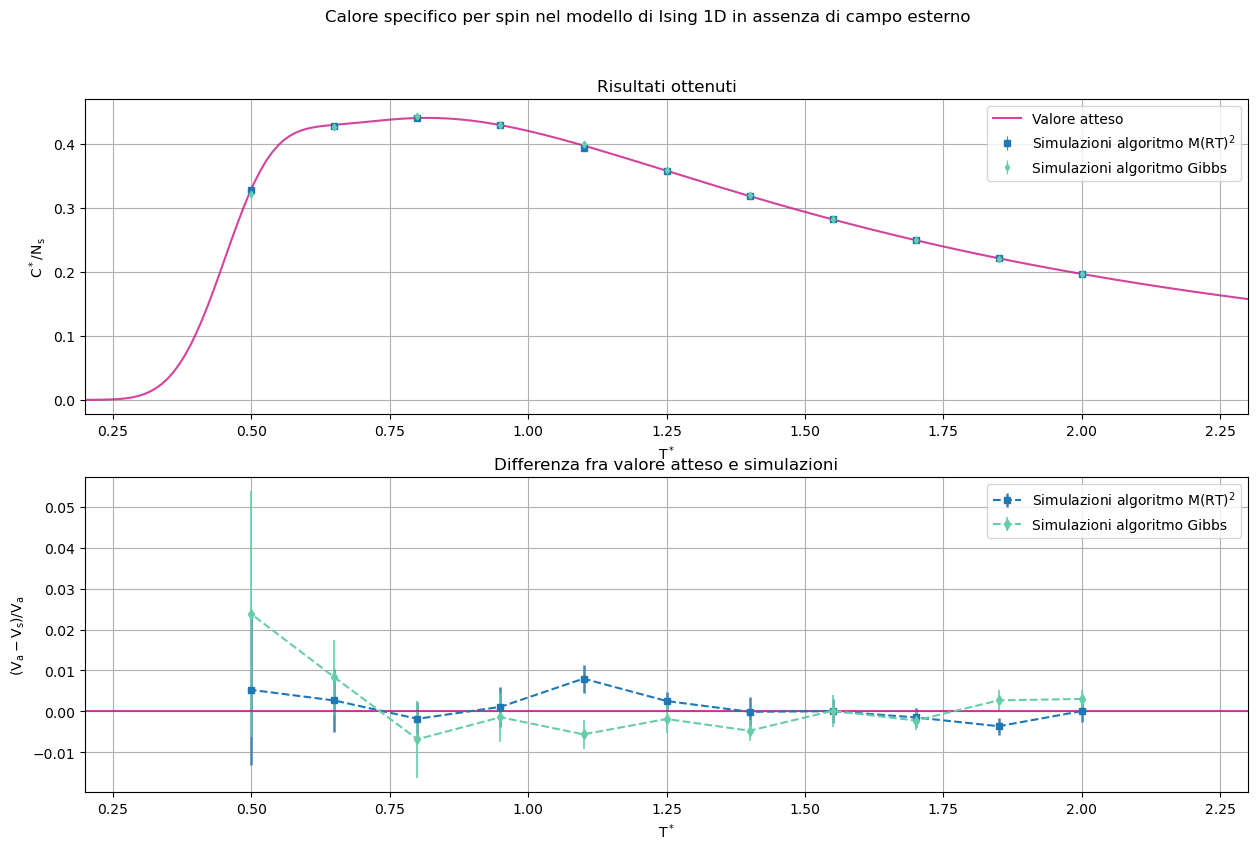

In [3]:
def Cs(T):  #calcolo analitico del calore specifico
    beta=1/T
    J=1.0
    Ns=50
    th=np.tanh(J/T)
    thN=th**Ns
    ch=1/th
    return ((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

metr_calspec, metr_errorcs=np.loadtxt("Risultati/metr_fin_specheat.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni
gib_calspec, gib_errorcs=np.loadtxt("Risultati/gib_fin_specheat.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni

csfig ,(csplt1, csplt2) = plt.subplots(2, 1, figsize=(15, 9))

csplt1.plot(T, Cs(T), color="mediumvioletred", label="Valore atteso", alpha=0.8)
csplt1.errorbar(x, metr_calspec, yerr=metr_errorcs, fmt='s', linestyle='', elinewidth=0.8, ecolor="steelblue", markersize=4.5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
csplt1.errorbar(x, gib_calspec, yerr=gib_errorcs, fmt='d', linestyle='', elinewidth=0.8, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=3.5, label=r"Simulazioni algoritmo Gibbs")
csplt1.set_xlabel(r"$\mathrm{T^*}$")
csplt1.set_ylabel(r"$\mathrm{C^* / N_s}$")
csplt1.set_xlim(T.min(), T.max())
csplt1.set_title("Risultati ottenuti")
csplt1.grid(True)
csplt1.legend()

csplt2.errorbar(x, (Cs(x)-metr_calspec)/Cs(x), yerr=metr_errorcs/Cs(x), fmt='s', linestyle='--', elinewidth=1.8, ecolor="steelblue", markersize=5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
csplt2.errorbar(x, (Cs(x)-gib_calspec)/Cs(x), yerr=gib_errorcs/Cs(x), fmt='d', linestyle='--', elinewidth=1.2, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=5, label=r"Simulazioni algoritmo Gibbs")
csplt2.axhline(y=0, color="mediumvioletred", alpha=0.8)
csplt2.set_xlabel(r"$\mathrm{T^*}$")
csplt2.set_ylabel(r"$\mathrm{ (V_a - V_s)/V_a }$")
csplt2.set_xlim(T.min(), T.max())
csplt2.set_title("Differenza fra valore atteso e simulazioni")
csplt2.grid(True)
csplt2.legend()

csfig.suptitle("Calore specifico per spin nel modello di Ising 1D in assenza di campo esterno")
plt.show()

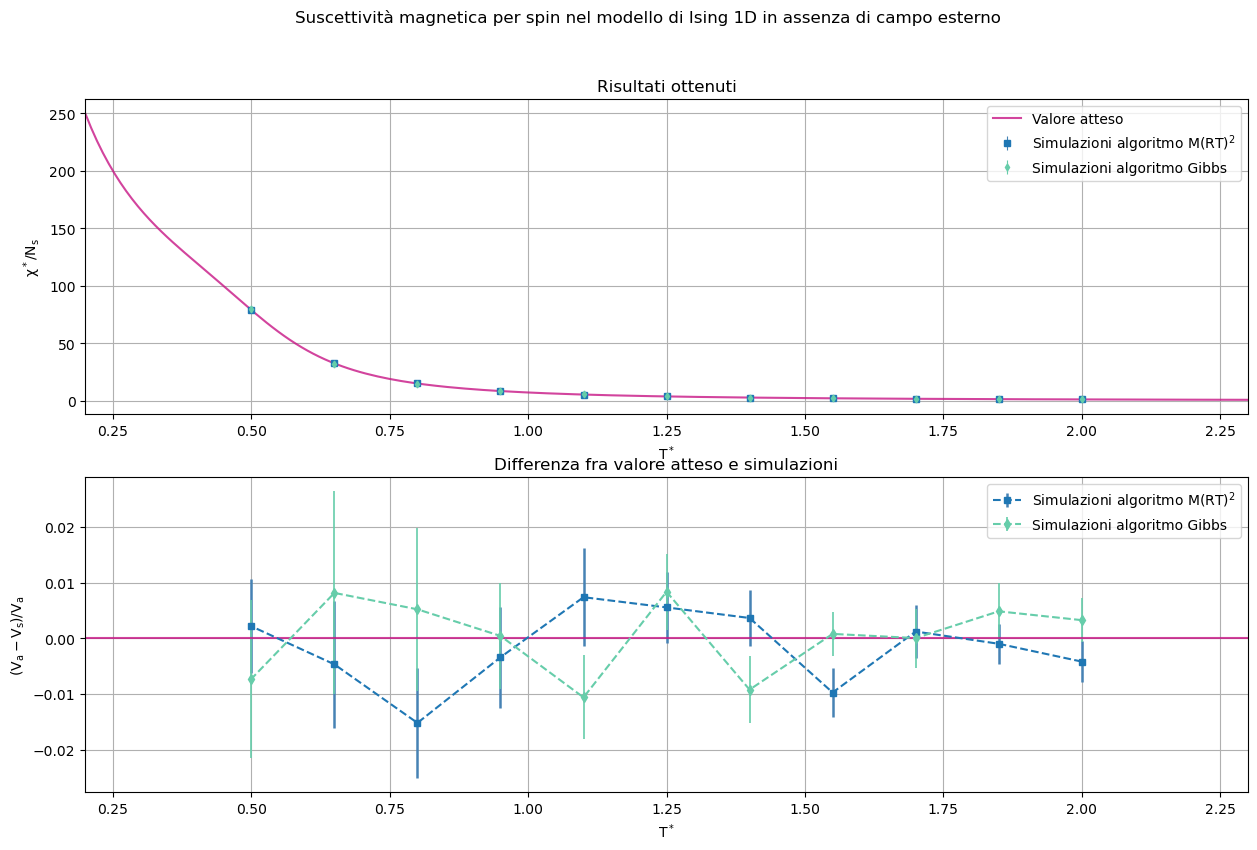

In [4]:
def Chi(T):  #calcolo analitico della suscettività
    beta=1/T
    J=1.0
    Ns=50
    th=np.tanh(J/T)
    thN=th**Ns
    return beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
    
metr_susc, metr_errorsu=np.loadtxt("Risultati/metr_fin_susc.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni
gib_susc, gib_errorsu=np.loadtxt("Risultati/gib_fin_susc.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni

sufig ,(suplt1, suplt2) = plt.subplots(2, 1, figsize=(15, 9))

suplt1.plot(T, Chi(T), color="mediumvioletred", label="Valore atteso", alpha=0.8)
suplt1.errorbar(x, metr_susc, yerr=metr_errorsu, fmt='s', linestyle='', elinewidth=0.8, ecolor="steelblue", markersize=4.5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
suplt1.errorbar(x, gib_susc, yerr=gib_errorsu, fmt='d', linestyle='', elinewidth=0.8, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=3.5, label=r"Simulazioni algoritmo Gibbs")
suplt1.set_xlabel(r"$\mathrm{T^*}$")
suplt1.set_ylabel(r"$\mathrm{ \chi ^* / N_s}$")
suplt1.set_xlim(T.min(), T.max())
suplt1.set_title("Risultati ottenuti")
suplt1.grid(True)
suplt1.legend()

suplt2.errorbar(x, (Chi(x)-metr_susc)/Chi(x), yerr=metr_errorsu/Chi(x), fmt='s', linestyle='--', elinewidth=1.8, ecolor="steelblue", markersize=5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
suplt2.errorbar(x, (Chi(x)-gib_susc)/Chi(x), yerr=gib_errorsu/Chi(x), fmt='d', linestyle='--', elinewidth=1.2, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=5, label=r"Simulazioni algoritmo Gibbs")
suplt2.axhline(y=0, color="mediumvioletred", alpha=0.8)
suplt2.set_xlabel(r"$\mathrm{T^*}$")
suplt2.set_ylabel(r"$\mathrm{ (V_a - V_s)/V_a }$")
suplt2.set_xlim(T.min(), T.max())
suplt2.set_title("Differenza fra valore atteso e simulazioni")
suplt2.grid(True)
suplt2.legend()

sufig.suptitle("Suscettività magnetica per spin nel modello di Ising 1D in assenza di campo esterno")
plt.show()

## Analisi in presenza di campo esterno

Una volta impostato $H^*=0.02$ ho svolto un'analisi analoga a quella già esposta per misurare la magnetizzazione del sistema. Ancora una volta, tutti i risultati sono compatibili con le previsioni analitiche entro al più $2\sigma$ e non si riscontrano sostanziali differenze fra i due algoritmi utilizzati per il campionamento.

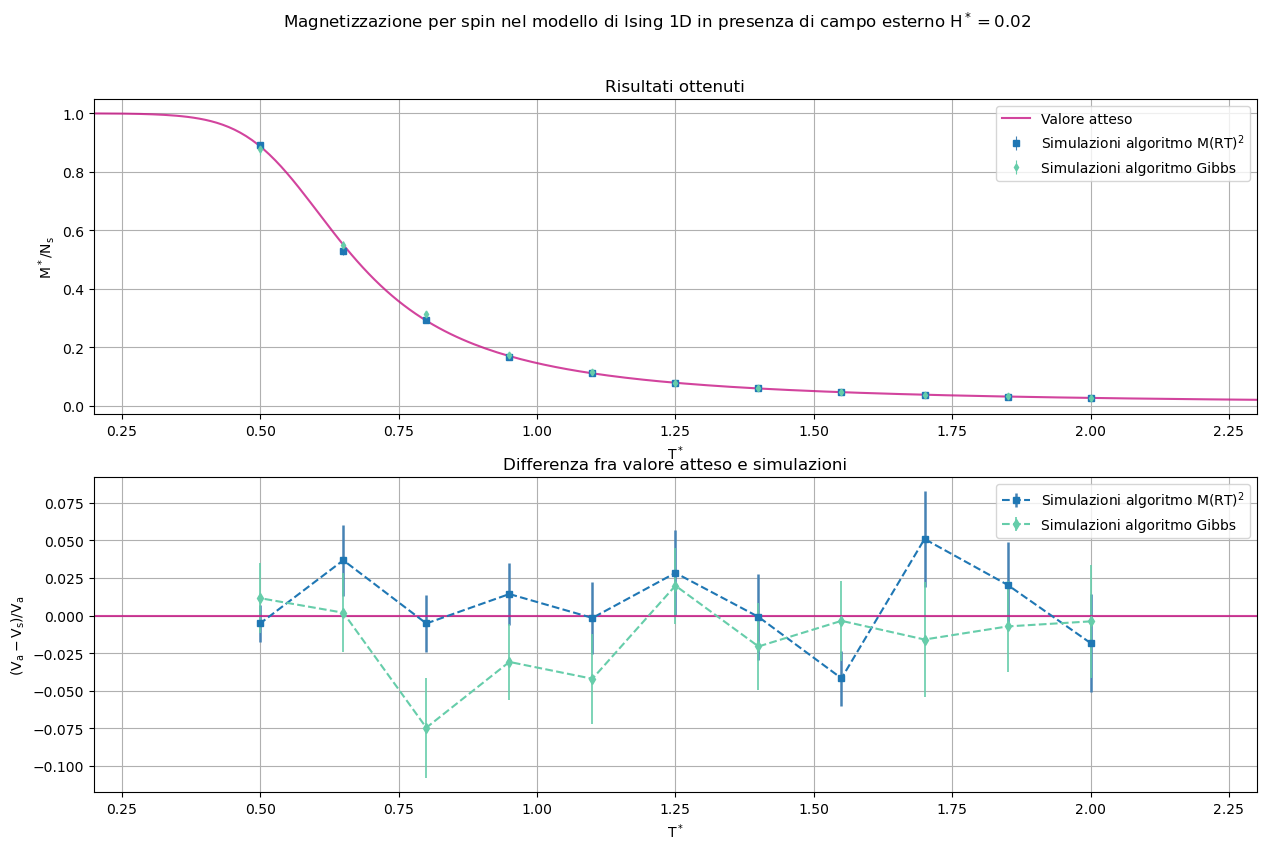

In [5]:
def Mag(T):  #calcolo analitico della magnetizzazione
    h=0.02 #external field
    b = 1/T
    J=1.0
    Ns=50
    l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    Z = l1**Ns + l2**Ns
    return (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

metr_magn, metr_errorma=np.loadtxt("Risultati/metr_fin_magn.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni
gib_magn, gib_errorma=np.loadtxt("Risultati/gib_fin_magn.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni

mafig ,(maplt1, maplt2) = plt.subplots(2, 1, figsize=(15, 9))

maplt1.plot(T, Mag(T), color="mediumvioletred", label="Valore atteso", alpha=0.8)
maplt1.errorbar(x, metr_magn, yerr=metr_errorma, fmt='s', linestyle='', elinewidth=0.8, ecolor="steelblue", markersize=4.5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
maplt1.errorbar(x, gib_magn, yerr=gib_errorma, fmt='d', linestyle='', elinewidth=0.8, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=3.5, label=r"Simulazioni algoritmo Gibbs")
maplt1.set_xlabel(r"$\mathrm{T^*}$")
maplt1.set_ylabel(r"$\mathrm{ M^* / N_s}$")
maplt1.set_xlim(T.min(), T.max())
maplt1.set_title("Risultati ottenuti")
maplt1.grid(True)
maplt1.legend()

maplt2.errorbar(x, (Mag(x)-metr_magn)/Mag(x), yerr=metr_errorma/Mag(x), fmt='s', linestyle='--', elinewidth=1.8, ecolor="steelblue", markersize=5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
maplt2.errorbar(x, (Mag(x)-gib_magn)/Mag(x), yerr=gib_errorma/Mag(x), fmt='d', linestyle='--', elinewidth=1.2, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=5, label=r"Simulazioni algoritmo Gibbs")
maplt2.axhline(y=0, color="mediumvioletred", alpha=0.8)
maplt2.set_xlabel(r"$\mathrm{T^*}$")
maplt2.set_ylabel(r"$\mathrm{ (V_a - V_s)/V_a }$")
maplt2.set_xlim(T.min(), T.max())
maplt2.set_title("Differenza fra valore atteso e simulazioni")
maplt2.grid(True)
maplt2.legend()

mafig.suptitle(r"Magnetizzazione per spin nel modello di Ising 1D in presenza di campo esterno $\mathrm{H^*}=0.02$")
plt.show()